In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
population = pd.read_csv("Population_final.csv")

In [3]:
population.head()

,Unnamed: 0,Country Name,Year,Population
0,0,Aruba,1960,54208.0
1,1,Africa Eastern and Southern,1960,130836765.0
2,2,Afghanistan,1960,8996967.0
3,3,Africa Western and Central,1960,96396419.0
4,4,Angola,1960,5454938.0


In [54]:
population_Syria_total= population.loc[(population["Country Name"]=="Syrian Arab Republic")]
population_Syria_total=population_Syria_total[["Country Name", "Year", "Population"]]

population_Syria_total = population_Syria_total.set_index("Year")
population_Syria_total.head()

,Country Name,Population
Year,,
1960,Syrian Arab Republic,4573514.0
1961,Syrian Arab Republic,4721893.0
1962,Syrian Arab Republic,4875429.0
1963,Syrian Arab Republic,5034639.0
1964,Syrian Arab Republic,5200341.0


<AxesSubplot:title={'center':'Syrian Population'}, xlabel='Year'>

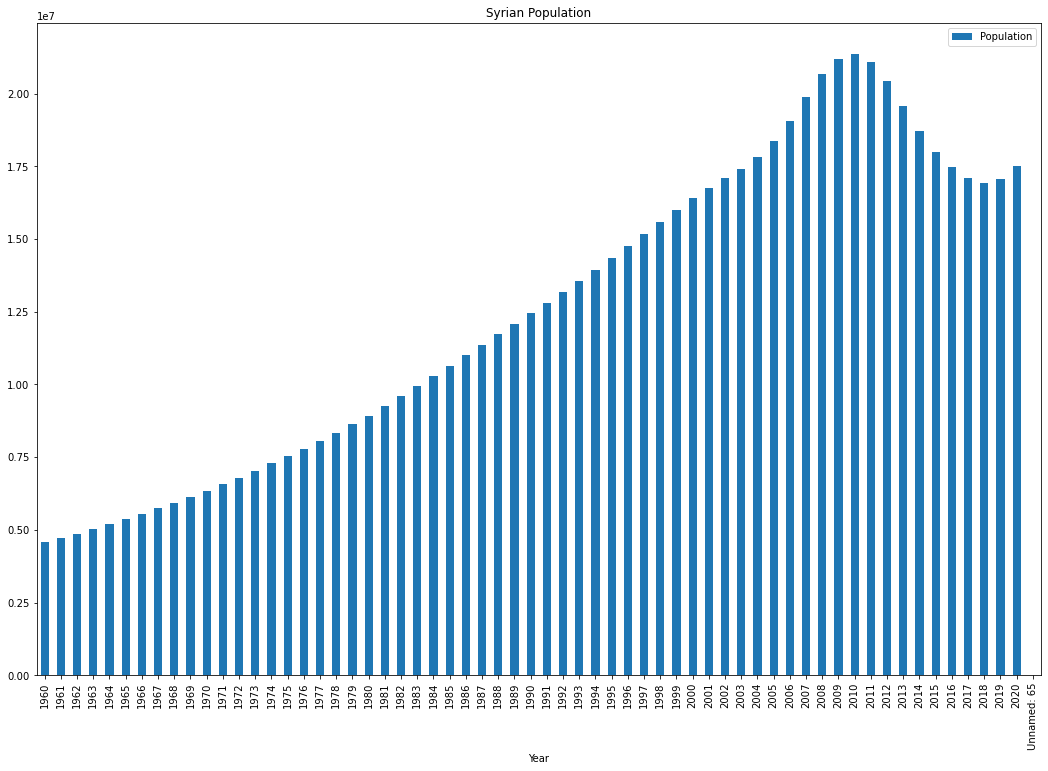

In [55]:
population_Syria_total.plot(kind= "bar", figsize = (18,12), title = "Syrian Population")

In [128]:
population_Syria_total.reset_index(drop=False, inplace = True)

population_Syria_total=population_Syria_total.dropna()


population_Syria_total=population_Syria_total[["Year", "Country Name", "Population"]]
population_Syria_total.head()
population_Syria_total['Year'] = pd.to_numeric(population_Syria_total['Year'])

population_Syria_total2 = population_Syria_total.loc[(population_Syria_total["Year"]<=2018)]

population_Syria_total.dtypes

Year              int64
Country Name     object
Population      float64
dtype: object

In [59]:

population_Syria_pre_war = population_Syria_total.loc[(population_Syria_total["Year"]<=2010)]
population_Syria_pre_war.tail()

,Year,Country Name,Population
46,2006,Syrian Arab Republic,19059257.0
47,2007,Syrian Arab Republic,19878257.0
48,2008,Syrian Arab Republic,20664037.0
49,2009,Syrian Arab Republic,21205873.0
50,2010,Syrian Arab Republic,21362541.0


In [37]:
! pip install pystan fbprophet
from fbprophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [65]:

population_Syria_total['ds'] = pd.to_datetime(population_Syria_total['Year'], format='%Y')

population_Syria_total["y"]= population_Syria_total[["Population"]]
population_Syria_total.head()
population_Syria_total_for_prophet= population_Syria_total[["ds", "y"]]
population_Syria_total_for_prophet.tail()




,ds,y
56,2016-01-01,17465567.0
57,2017-01-01,17095669.0
58,2018-01-01,16945062.0
59,2019-01-01,17070132.0
60,2020-01-01,17500657.0


In [130]:

population_Syria_total2['ds'] = pd.to_datetime(population_Syria_total2['Year'], format='%Y')

population_Syria_total2["y"]= population_Syria_total2[["Population"]]

population_Syria_total2= population_Syria_total2[["ds","y"]]

population_Syria_total2.head()

/var/folders/bc/88y__jqx7s591njj3c2hmjn40000gn/T/ipykernel_50471/1416024556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_Syria_total2['ds'] = pd.to_datetime(population_Syria_total2['Year'], format='%Y')
/var/folders/bc/88y__jqx7s591njj3c2hmjn40000gn/T/ipykernel_50471/1416024556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_Syria_total2["y"]= population_Syria_total2[["Population"]]


,ds,y
0,1960-01-01,4573514.0
1,1961-01-01,4721893.0
2,1962-01-01,4875429.0
3,1963-01-01,5034639.0
4,1964-01-01,5200341.0


In [61]:
m= Prophet(interval_width= 0.95)
model = m.fit(population_Syria_total_for_prophet)




INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -70.6096
Iteration  1. Log joint probability =    58.7942. Improved by 129.404.
Iteration  2. Log joint probability =    98.6434. Improved by 39.8492.
Iteration  3. Log joint probability =    117.757. Improved by 19.1136.
Iteration  4. Log joint probability =    129.605. Improved by 11.848.
Iteration  5. Log joint probability =    132.847. Improved by 3.24235.
Iteration  6. Log joint probability =    133.203. Improved by 0.355271.
Iteration  7. Log joint probability =     133.27. Improved by 0.0678646.
Iteration  8. Log joint probability =    133.302. Improved by 0.0312285.
Iteration  9. Log joint probability =     133.42. Improved by 0.118749.
Iteration 10. Log joint probability =    133.456. Improved by 0.0359732.
Iteration 11. Log joint probability =    133.604. Improved by 0.147904.
Iteration 12. Log joint probability =    133.684. Improved by 0.0792252.
Iteration 13. Log joint probability =    133.711. Improved by 0.027078.
Iteration 14. Log joint 

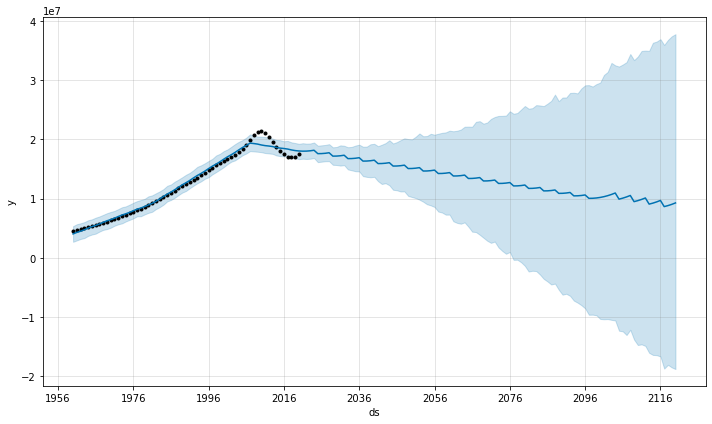

In [62]:
future1= m.make_future_dataframe(periods=100, freq= "Y")
forecast = m.predict(future1)
plot1=m.plot(forecast)



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -68.7909
Iteration  1. Log joint probability =    57.2258. Improved by 126.017.
Iteration  2. Log joint probability =    98.6712. Improved by 41.4454.
Iteration  3. Log joint probability =    124.961. Improved by 26.2899.
Iteration  4. Log joint probability =    129.347. Improved by 4.38629.
Iteration  5. Log joint probability =    136.196. Improved by 6.84847.
Iteration  6. Log joint probability =    136.477. Improved by 0.281511.
Iteration  7. Log joint probability =    136.656. Improved by 0.178871.
Iteration  8. Log joint probability =    136.683. Improved by 0.0267235.
Iteration  9. Log joint probability =    136.735. Improved by 0.0523579.
Iteration 10. Log joint probability =    136.864. Improved by 0.128681.
Iteration 11. Log joint probability =      136.9. Improved by 0.0356448.
Iteration 12. Log joint probability =    136.938. Improved by 0.0380257.
Iteration 13. Log joint probability =    136.972. Improved by 0.0342833.
Iteration 14. Log join

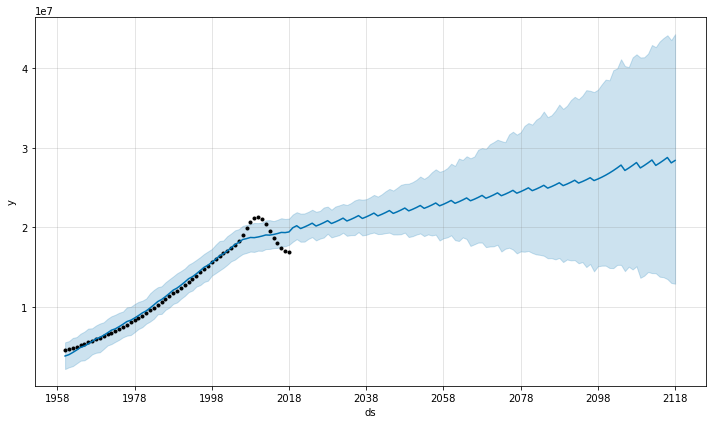

In [132]:
m= Prophet(interval_width= 0.95)
model = m.fit(population_Syria_total2)

future1= m.make_future_dataframe(periods=100, freq= "Y")
forecast_new = m.predict(future1)
plot1=m.plot(forecast_new)


In [179]:
syrian_population_forecast= forecast[["ds", "yhat"]]
syrian_population_forecast = syrian_population_forecast.rename(columns={'ds': 'Year', 'yhat': 'predicted_population'})
import datetime
syrian_population_forecast["Year"] = syrian_population_forecast["Year"].dt.year

syrian_population_forecast.head()






,Year,predicted_population
0,1960,3.851485e+06
1,1961,4.020992e+06
2,1962,4.296613e+06
3,1963,4.600419e+06
4,1964,4.932340e+06


In [180]:

syrian_population_forecast_new= forecast_new[["ds", "yhat"]]
syrian_population_forecast_new = syrian_population_forecast_new.rename(columns={'ds': 'Year', 'yhat': 'predicted_population'})
syrian_population_forecast_new["Year"] = syrian_population_forecast_new["Year"].dt.year

syrian_population_forecast_new.head()


,Year,predicted_population
0,1960,3.851485e+06
1,1961,4.020992e+06
2,1962,4.296613e+06
3,1963,4.600419e+06
4,1964,4.932340e+06


In [66]:
population_Syria_pre_war['ds'] = pd.to_datetime(population_Syria_pre_war['Year'], format='%Y')

population_Syria_pre_war["y"]= population_Syria_pre_war[["Population"]]

population_Syria_pre_war_for_prophet= population_Syria_pre_war[["ds", "y"]]
population_Syria_pre_war_for_prophet.tail()

/var/folders/bc/88y__jqx7s591njj3c2hmjn40000gn/T/ipykernel_50471/95987677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_Syria_pre_war['ds'] = pd.to_datetime(population_Syria_pre_war['Year'], format='%Y')
/var/folders/bc/88y__jqx7s591njj3c2hmjn40000gn/T/ipykernel_50471/95987677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_Syria_pre_war["y"]= population_Syria_pre_war[["Population"]]


,ds,y
46,2006-01-01,19059257.0
47,2007-01-01,19878257.0
48,2008-01-01,20664037.0
49,2009-01-01,21205873.0
50,2010-01-01,21362541.0


In [67]:
m= Prophet(interval_width= 0.95)
model= m.fit(population_Syria_pre_war_for_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -61.1997
Iteration  1. Log joint probability =    53.6011. Improved by 114.801.
Iteration  2. Log joint probability =    100.645. Improved by 47.0437.
Iteration  3. Log joint probability =    117.499. Improved by 16.8539.
Iteration  4. Log joint probability =    147.357. Improved by 29.8578.
Iteration  5. Log joint probability =    147.432. Improved by 0.0750106.
Iteration  6. Log joint probability =    148.824. Improved by 1.39268.
Iteration  7. Log joint probability =    149.211. Improved by 0.387035.
Iteration  8. Log joint probability =    149.777. Improved by 0.566069.
Iteration  9. Log joint probability =    150.621. Improved by 0.84412.
Iteration 10. Log joint probability =    150.719. Improved by 0.0972355.
Iteration 11. Log joint probability =    151.033. Improved by 0.314468.
Iteration 12. Log joint probability =    151.041. Improved by 0.00776556.
Iteration 13. Log joint probability =    151.856. Improved by 0.814559.
Iteration 14. Log joint 

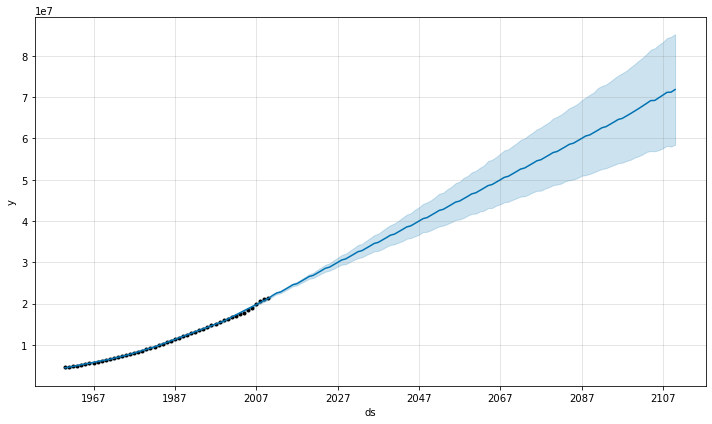

In [68]:
future1= m.make_future_dataframe(periods=100, freq= "Y")
forecast_pre_war = m.predict(future1)
plot1=m.plot(forecast_pre_war)

In [169]:
syrian_population_forecast_no_war= forecast_pre_war[["ds", "yhat"]]
syrian_population_forecast_no_war = syrian_population_forecast_no_war.rename(columns={'ds': 'Year', 'yhat': 'predicted_population'})

syrian_population_forecast_no_war["Year"] = syrian_population_forecast_no_war["Year"].dt.year


syrian_population_forecast_no_war=syrian_population_forecast_no_war.set_index("Year")
syrian_population_forecast_no_war.tail()






,predicted_population
Year,
2105,6.983404e+07
2106,7.048598e+07
2107,7.115542e+07
2108,7.120044e+07
2109,7.183452e+07


In [172]:
#syrian_population_forecast["Year"] = syrian_population_forecast["Year"].dt.year


#syrian_population_forecast=syrian_population_forecast.set_index("Year")
syrian_population_forecast.dtypes




Year                      int64
predicted_population    float64
dtype: object

In [184]:
syrian_population_forecast_no_war.head()

,predicted_population
Year,
1960,4.479945e+06
1961,4.660810e+06
1962,4.833234e+06
1963,5.024951e+06
1964,5.235904e+06


In [185]:
#syrian_population_forecast_new=syrian_population_forecast_new.reset_index()

syrian_population_forecast_new=syrian_population_forecast_new[["Year","predicted_population"]]

syrian_population_forecast_new=syrian_population_forecast_new.set_index("Year")
syrian_population_forecast_new.head()

,predicted_population
Year,
1960,3.851485e+06
1961,4.020992e+06
1962,4.296613e+06
1963,4.600419e+06
1964,4.932340e+06


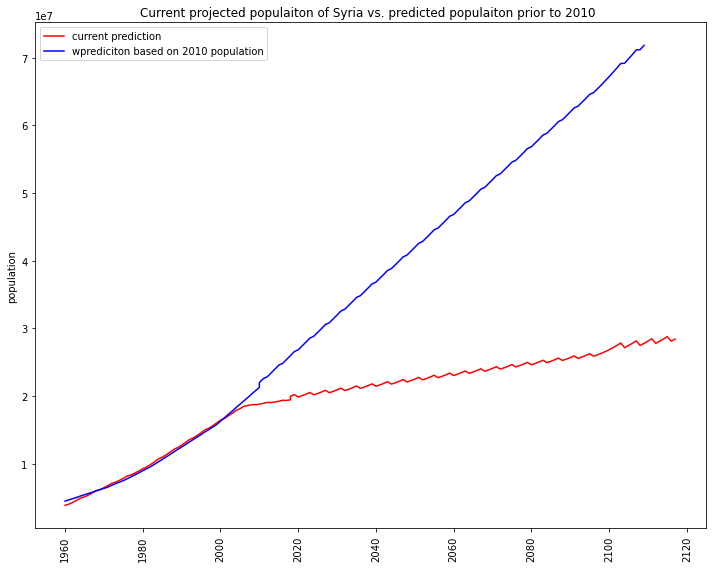

In [194]:
fig, ax1 = plt.subplots()
plt.xticks(rotation=90)


ax1.plot(syrian_population_forecast_new, label = "current prediction", color= "red")
ax1.plot(syrian_population_forecast_no_war, label= "wprediciton based on 2010 population", color= "blue")

plt.legend(loc= "upper right")
ax1.set_ylabel("population", color="black")
plt.rcParams['figure.figsize'] = (8,7)
plt.xticks(rotation=90)
ax1.set_ylabel("population", color="black")

plt.legend()
plt.title("Current projected populaiton of Syria vs. predicted populaiton prior to 2010 ")

fig.tight_layout()
plt.show()

In [195]:
syrian_population_forecast_new.to_csv("true_forecast_syrian_pop.csv")

In [196]:
syrian_population_forecast_no_war.to_csv("syrian_pop_if_no_war.csv")